In [218]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [219]:
pd.set_option('display.max_rows', None)

In [220]:
df = pd.read_csv('https://media.githubusercontent.com/media/mayurasandakalum/datasets/main/shop-customer-data/Customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income ($),Spending Score (1-100),Profession,Work Experience,Family Size
0,1,Male,19,15000,39,Healthcare,1,4
1,2,Male,21,35000,81,Engineer,3,3
2,3,Female,20,86000,6,Engineer,1,1
3,4,Female,23,59000,77,Lawyer,0,2
4,5,Female,31,38000,40,Entertainment,2,6


In [221]:
df.describe()

,CustomerID,Age,Annual Income ($),Spending Score (1-100),Work Experience,Family Size
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1000.500000,48.960000,110731.821500,50.962500,4.102500,3.768500
std,577.494589,28.429747,45739.536688,27.934661,3.922204,1.970749
min,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,500.750000,25.000000,74572.000000,28.000000,1.000000,2.000000
50%,1000.500000,48.000000,110045.000000,50.000000,3.000000,4.000000
75%,1500.250000,73.000000,149092.750000,75.000000,7.000000,5.000000
max,2000.000000,99.000000,189974.000000,100.000000,17.000000,9.000000


In [222]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              2000 non-null   int64 
 1   Gender                  2000 non-null   object
 2   Age                     2000 non-null   int64 
 3   Annual Income ($)       2000 non-null   int64 
 4   Spending Score (1-100)  2000 non-null   int64 
 5   Profession              1965 non-null   object
 6   Work Experience         2000 non-null   int64 
 7   Family Size             2000 non-null   int64 
dtypes: int64(6), object(2)
memory usage: 125.1+ KB


remove null values

In [223]:
df.isnull().sum()

CustomerID                 0
Gender                     0
Age                        0
Annual Income ($)          0
Spending Score (1-100)     0
Profession                35
Work Experience            0
Family Size                0
dtype: int64

In [224]:
df = df.dropna(subset=['Profession'])
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income ($)         0
Spending Score (1-100)    0
Profession                0
Work Experience           0
Family Size               0
dtype: int64

get column names

In [225]:
all_columns = df.columns.to_list()
categorical_columns = df.select_dtypes(include=['object']).columns.to_list()
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns.to_list()

print(all_columns)
print(categorical_columns)
print(numerical_columns)

['CustomerID', 'Gender', 'Age', 'Annual Income ($)', 'Spending Score (1-100)', 'Profession', 'Work Experience', 'Family Size']
['Gender', 'Profession']
['CustomerID', 'Age', 'Annual Income ($)', 'Spending Score (1-100)', 'Work Experience', 'Family Size']


In [226]:
for column in numerical_columns:
    if column == "Work Experience":
        continue
    
    index = df[column].value_counts().sort_index().index[0]
    
    if index == 0:
        print(column)
        print(f"{df[column].value_counts().sort_index().index[0]} - {df[column].value_counts().sort_index().values[0]}")

Age
0 - 23
Annual Income ($)
0 - 2
Spending Score (1-100)
0 - 2


In [227]:
for column in numerical_columns:
    if column == "Work Experience":
        continue

    index = df[column].value_counts().sort_index().index[0]

    if index == 0:
        df = df[df[column] != 0]

In [228]:
df.shape

(1938, 8)

In [229]:
for column in ["Gender", "Profession"]:
    print(df[column].value_counts())
    print("\n")

Gender
Female    1149
Male       789
Name: count, dtype: int64


Profession
Artist           606
Healthcare       338
Entertainment    231
Engineer         175
Doctor           156
Executive        152
Lawyer           139
Marketing         81
Homemaker         60
Name: count, dtype: int64




outliers

In [230]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1938 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              1938 non-null   int64 
 1   Gender                  1938 non-null   object
 2   Age                     1938 non-null   int64 
 3   Annual Income ($)       1938 non-null   int64 
 4   Spending Score (1-100)  1938 non-null   int64 
 5   Profession              1938 non-null   object
 6   Work Experience         1938 non-null   int64 
 7   Family Size             1938 non-null   int64 
dtypes: int64(6), object(2)
memory usage: 136.3+ KB


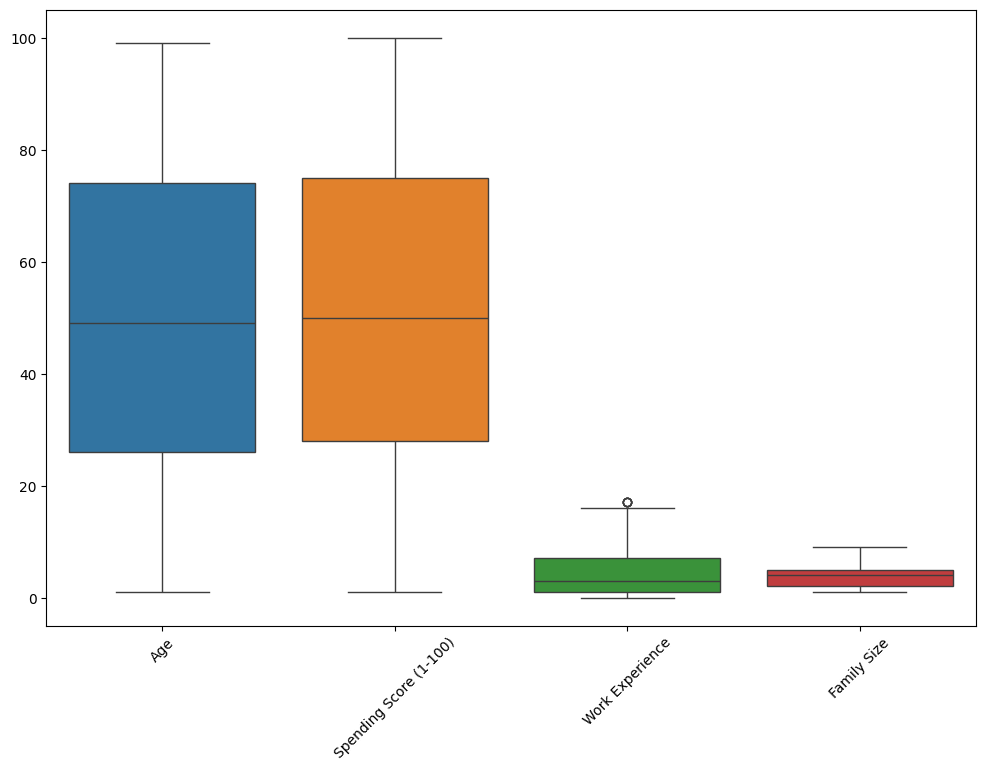

In [232]:
df1 = df[["Age", "Spending Score (1-100)", "Work Experience", "Family Size"]]

plt.figure(figsize=(12, 8))
sns.boxplot(data=df1)
plt.xticks(rotation=45)
plt.show()

In [233]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1938 entries, 0 to 1999
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   Age                     1938 non-null   int64
 1   Spending Score (1-100)  1938 non-null   int64
 2   Work Experience         1938 non-null   int64
 3   Family Size             1938 non-null   int64
dtypes: int64(4)
memory usage: 75.7 KB


In [235]:
# remove outliers
for column in df1.columns:
    if column:
        q1 = df1[column].quantile(0.25)
        q3 = df1[column].quantile(0.75)
        iqr = q3 - q1
        lower_bound = q1 - (1.5 * iqr)
        upper_bound = q3 + (1.5 * iqr)
        df1 = df1[(df1[column] > lower_bound) & (df1[column] < upper_bound)]

In [236]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1928 entries, 0 to 1999
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   Age                     1928 non-null   int64
 1   Spending Score (1-100)  1928 non-null   int64
 2   Work Experience         1928 non-null   int64
 3   Family Size             1928 non-null   int64
dtypes: int64(4)
memory usage: 75.3 KB
